## nn.Module & nn.Parameter

In [1]:
import torch
from torch import nn
from torch import Tensor

In [2]:
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features, bias = True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = nn.Parameter(
            torch.randn(in_features, out_features))
        
        self.bias = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x: Tensor):
        return x @ self.weights + self.bias

In [3]:
x = torch.randn(5,7)

In [4]:
layer = MyLinear(7,12)
lay_x = layer(x)

In [5]:
lay_x.shape

torch.Size([5, 12])

In [6]:
for value in layer.parameters():
    print(value)

Parameter containing:
tensor([[-0.7861, -0.1752,  1.3804,  0.5055,  0.3558, -0.6672, -1.0471,  2.7450,
          0.1769,  0.8387,  0.6298,  2.1714],
        [-0.9577, -1.1631, -0.8925, -0.4803,  0.4290,  1.3475, -1.5480, -1.8081,
          1.0301, -0.1558,  1.7400, -0.3013],
        [ 0.8493,  0.6356,  1.5303,  0.2278,  1.1593, -2.3947,  0.5695, -0.3122,
         -0.6714, -1.5633,  0.7259,  0.4380],
        [-0.8769, -0.7541, -0.3214, -0.2301,  1.8422,  0.6791,  0.5207, -0.9217,
          1.7022,  0.9949,  0.5079,  1.5329],
        [-1.8491,  0.6746,  0.9236,  0.7052, -0.1612,  0.8952, -0.7892,  1.0740,
         -0.2021, -0.2801, -1.1727,  1.8484],
        [-0.3137, -0.2655, -0.8367, -0.3055, -1.0440,  1.0350, -1.3122, -0.3588,
          0.0507, -0.2573,  0.6986,  0.2726],
        [-0.8597, -0.5373,  0.2684,  1.6972, -0.7549,  1.4028,  1.9817, -0.2331,
          1.9319,  0.0717,  1.4331, -0.3107]], requires_grad=True)
Parameter containing:
tensor([ 1.1491, -1.1274, -1.3333, -1.8661,  0

In [7]:
import numpy as np 

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1,1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1,1)

In [8]:
x_train.shape

(11, 1)

In [9]:
y_train.shape

(11, 1)

In [10]:
import torch
from torch.autograd import Variable

class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [11]:
inputDim = 1
outputDim = 1
LR = 0.01
epochs = 100

In [12]:
model = LinearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

In [13]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [14]:
for epoch in range(epochs):
    
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    
    # clear gradient 
    optimizer.zero_grad()
    
    # get output from the model, given the inputs
    outputs = model(inputs)
    
    # get loss for the parameter output
    loss = criterion(outputs, labels) # 모델의 출력과(outputs), 실제 정답 label(labels)의 MSELoss를 구함 
    
    
    # get gradients w, r, t to parameters
    loss.backward()
    
    
    #parameter update
    optimizer.step()
    
    print(f'epoch : {epoch}, loss {loss.item()} ')

epoch : 0, loss 61.6507682800293 
epoch : 1, loss 5.563124179840088 
epoch : 2, loss 1.003645658493042 
epoch : 3, loss 0.6213286519050598 
epoch : 4, loss 0.5829774141311646 
epoch : 5, loss 0.5743927359580994 
epoch : 6, loss 0.5677797794342041 
epoch : 7, loss 0.561373770236969 
epoch : 8, loss 0.5551693439483643 
epoch : 9, loss 0.5489109754562378 
epoch : 10, loss 0.5428904294967651 
epoch : 11, loss 0.5367739796638489 
epoch : 12, loss 0.5307098627090454 
epoch : 13, loss 0.5247999429702759 
epoch : 14, loss 0.5188748836517334 
epoch : 15, loss 0.5131330490112305 
epoch : 16, loss 0.507341206073761 
epoch : 17, loss 0.5017589330673218 
epoch : 18, loss 0.49609676003456116 
epoch : 19, loss 0.490664541721344 
epoch : 20, loss 0.48512789607048035 
epoch : 21, loss 0.4798392057418823 
epoch : 22, loss 0.47442394495010376 
epoch : 23, loss 0.4690607488155365 
epoch : 24, loss 0.4638340473175049 
epoch : 25, loss 0.458590567111969 
epoch : 26, loss 0.4534957706928253 
epoch : 27, loss

In [15]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 0.16845481]
 [ 2.2875955 ]
 [ 4.406736  ]
 [ 6.5258765 ]
 [ 8.645018  ]
 [10.764158  ]
 [12.883299  ]
 [15.0024395 ]
 [17.12158   ]
 [19.24072   ]
 [21.359861  ]]


In [16]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [17]:
for p in model.parameters():
    if p.requires_grad:
        print(p.name, p.data)

None tensor([[2.1193]], device='cuda:0')
None tensor([0.1685], device='cuda:0')


### Backward

1. Forward과정을 통해 얻어진 Model의 출력값(outputs)과 정답값(labels)의 차이를 Loss funtion을 통해 계산하여 Loss값을 얻는다.
2. Backward는 Loss값을 활용해 미분을 수행하고, back-propagation을 통해 parameter(weight)를 업데이트한다. 
3. 모델은 back-propagation을 통해 지속적으로 파라미터를 업데이트하게 된다. 

In [18]:
from IPython.display import Image

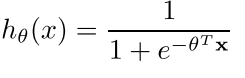

In [19]:
Image("./img/lr.png")

In [30]:
class LogisticRegression(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LogisticRegression, self).__init__()
        
        # 파라미터 초기화
        
        self.w = torch.zeros(dim, 1, dtype = torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw" : torch.zeros(dim,1, dtype=torch.float).to(device),
                      "db" : torch.scalar_tensor(0).to(device)
                     }
        self.lr = lr.to(device)
        
    def forward(self, x):
        
        z = torch.mm(self.w.T,x)
        a = self.sigmoid(z)
        
        return a
    
    def sigmoid(self,z):
        return 1 / (1 + torch.exp(-z))
    def backward(self, x, yhat, y):
        
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x,(yhat-y).T)
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat-y) # x가 1일 때 
    
    def optimize(self):
        
        self.w = self.w - self.lr*self.grads["dw"]
        self.b = self.b - self.lr*self.grads["db"]

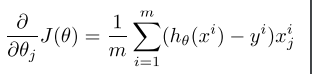

In [28]:
Image("./img/lr_fw.png") # w 에 대해서 미분 

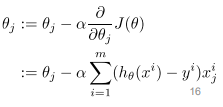

In [29]:
Image("./img/lr_bw.png") # bias 에 대해 미분 